# VERIFICACION RAPIDO DE LA DATA

In [1]:
# Librerias a utilizar
import pandas as pd
import sketch
import matplotlib.pyplot as plt
import dtale.app as dtale_app
import sweetviz as sv
from ydata_profiling import ProfileReport
import warnings
import dtale
import missingno as msno
from unidecode import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
# Carga de la data
df = pd.read_csv("../datasets/movies_etl.csv")

In [3]:
# Visualizacion de las caracterisitcas de los datos
# Cantidad de columnas y filas en la data y el tipo de data

print(df.shape)
print(type(df))
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df.head(2)

(45376, 21)
<class 'pandas.core.frame.DataFrame'>


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,year,month,day,return
0,Toy Story Collection,30000000,"['Animation', 'Comedy...",862,en,"Led by Woody, Andy's ...",21.946943,['Pixar Animation Stu...,['United States of Am...,1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995,Octubre,Lunes,12.45
1,NaN,65000000,"['Adventure', 'Fantas...",8844,en,When siblings Judy an...,17.015539,"['TriStar Pictures', ...",['United States of Am...,1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unl...,Jumanji,6.9,1995,Diciembre,Viernes,4.04


In [4]:
# Cambio del encabezado de la data
nuevos_nombres = {
    'belongs_to_collection': 'coleccion',
    'budget': 'presupuesto',
    'genres': 'genero',
    'id': 'id',
    'original_language': 'idioma_original',
    'overview': 'sinopsis',
    'popularity': 'popular',
    'production_companies': 'cia_productora',
    'production_countries': 'pais',
    'release_date': 'estreno',
    'revenue': 'ganancia',
    'runtime': 'duracion',
    'spoken_languages': 'idioma_hablado',
    'status': 'estado',
    'tagline': 'lema',
    'title': 'titulo',
    'vote_average': 'prom_voto',
    'year': 'anio',
    'month': 'mes',
    'day': 'dia',
    'return': 'retorno'
}

df = df.rename(columns=nuevos_nombres)

In [5]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   coleccion        4488 non-null   object 
 1   presupuesto      45376 non-null  int64  
 2   genero           42992 non-null  object 
 3   id               45376 non-null  int64  
 4   idioma_original  45365 non-null  object 
 5   sinopsis         44435 non-null  object 
 6   popular          45376 non-null  float64
 7   cia_productora   33580 non-null  object 
 8   pais             39165 non-null  object 
 9   estreno          45376 non-null  object 
 10  ganancia         45376 non-null  float64
 11  duracion         45130 non-null  float64
 12  idioma_hablado   41608 non-null  object 
 13  estado           45296 non-null  object 
 14  lema             20398 non-null  object 
 15  titulo           45376 non-null  object 
 16  prom_voto        45376 non-null  float64
 17  anio        

In [6]:
#Obteniendo los valores unicos de cada columna
df.nunique()

coleccion           1695
presupuesto         1223
genero              4064
id                 45346
idioma_original       89
sinopsis           44232
popular            43731
cia_productora     22667
pais                2388
estreno            17333
ganancia            6863
duracion             353
idioma_hablado      1842
estado                 6
lema               20269
titulo             42196
prom_voto             92
anio                 135
mes                   12
dia                    7
retorno             1256
dtype: int64

In [8]:
df.head(3)

,coleccion,presupuesto,genero,id,idioma_original,sinopsis,popular,cia_productora,pais,estreno,ganancia,duracion,idioma_hablado,estado,lema,titulo,prom_voto,anio,mes,dia,retorno
0,Toy Story Collection,30000000,"['Animation', 'Comedy...",862,en,"Led by Woody, Andy's ...",21.946943,['Pixar Animation Stu...,['United States of Am...,1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995,Octubre,Lunes,12.45
1,NaN,65000000,"['Adventure', 'Fantas...",8844,en,When siblings Judy an...,17.015539,"['TriStar Pictures', ...",['United States of Am...,1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unl...,Jumanji,6.9,1995,Diciembre,Viernes,4.04
2,Grumpy Old Men Collec...,0,"['Romance', 'Comedy']",15602,en,A family wedding reig...,11.712900,"['Warner Bros.', 'Lan...",['United States of Am...,1995-12-22,0.0,101.0,['English'],Released,Still Yelling. Still ...,Grumpier Old Men,6.5,1995,Diciembre,Viernes,0.00


In [ ]:
df.describe()

In [ ]:
df.describe(include ='all')

# EDA

### 1. Correción de las columnas ganancia y presupuesto, de dolares a millones

In [ ]:
# Dividir la columna "ganancia" por 1,000,000 para convertir a millones de dólares
df['ganancia'] = df['ganancia'] / 1000000

# Renombrar la columna "ganancia" a "ganancia (millones)"
df = df.rename(columns={'ganancia': 'ganancia (mill)'})

# Dividir la columna "preupuesto" por 1,000,000 para convertir a millones de dólares
df['presupuesto'] = df['presupuesto'] / 1000000
# Renombrar la columna "presupuesto" a "presupuesto (millones)"
df = df.rename(columns={'presupuesto': 'presupuesto (mill)'})

## Exploracion de los datos utilizando la libreria **MISSINGNO**

In [ ]:
msno.bar(df)

In [ ]:
msno.matrix(df)

In [ ]:
msno.heatmap(df)

In [ ]:
msno.dendrogram(df)

#### a. Verificando los datos faltantes

In [ ]:
# Verificacion de valores vacíos o nulos
df.isnull().sum()

In [11]:
df.isnull()

,coleccion,presupuesto (mill),genero,id,idioma_original,sinopsis,popular,cia_productora,pais,estreno,ganancia (mill),duracion,idioma_hablado,estado,lema,titulo,prom_voto,anio,mes,dia,retorno
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45371,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
45372,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
45373,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45374,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False


In [13]:
# Determinacion del porcentaje de datos nulos por columna
porc_nulos = df.isnull().sum() * 100 / len(df)
porc_nulos

coleccion             90.109309
presupuesto (mill)     0.000000
genero                 5.253879
id                     0.000000
idioma_original        0.024242
sinopsis               2.073783
popular                0.000000
cia_productora        25.996121
pais                  13.687853
estreno                0.000000
ganancia (mill)        0.000000
duracion               0.542137
idioma_hablado         8.303949
estado                 0.176305
lema                  55.046721
titulo                 0.000000
prom_voto              0.000000
anio                   0.000000
mes                    0.000000
dia                    0.000000
retorno                0.000000
dtype: float64

In [14]:
# Reemplazamos todos los nulos con valores vacios de todas las columnas que tienen NaN
df['coleccion'].fillna('', inplace=True)
df['genero'].fillna('', inplace=True)
df['sinopsis'].fillna('', inplace=True)
df['idioma_original'].fillna('', inplace=True)
df['cia_productora'].fillna('', inplace=True)
df['pais'].fillna('', inplace=True)
df['duracion'].fillna('', inplace=True)
df['idioma_hablado'].fillna('', inplace=True)
df['estado'].fillna('', inplace=True)
df['lema'].fillna('', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coleccion           45376 non-null  object 
 1   presupuesto (mill)  45376 non-null  float64
 2   genero              45376 non-null  object 
 3   id                  45376 non-null  int64  
 4   idioma_original     45376 non-null  object 
 5   sinopsis            45376 non-null  object 
 6   popular             45376 non-null  float64
 7   cia_productora      45376 non-null  object 
 8   pais                45376 non-null  object 
 9   estreno             45376 non-null  object 
 10  ganancia (mill)     45376 non-null  float64
 11  duracion            45376 non-null  object 
 12  idioma_hablado      45376 non-null  object 
 13  estado              45376 non-null  object 
 14  lema                45376 non-null  object 
 15  titulo              45376 non-null  object 
 16  prom

## Exploracion de los datos utilizando la libreria **YDATA PROFILING**

In [ ]:
# Vamos a usar el ProfileReport
ProfileReport(df)

check for duplicate data
Para mantener una sola fila de cada uno de los duplicados en un DataFrame, puedes utilizar el método drop_duplicates() sin especificar ningún parámetro. Esto eliminará todas las filas duplicadas y conservará solo una de ellas.

In [ ]:
dup_data = df.duplicated().any()
print("Hay valores duplicados?", dup_data)

In [ ]:
# Eliminar duplicados de filas
df_unique = df.drop_duplicates()

In [ ]:
# Reemplazando letras especiales
def replace_spoken_languages(languages):
    if languages == ['Français']:
        return ['french']
    elif languages == ['English', 'Français']:
        return ['English', 'French']
    elif languages == ['français']:
        return ['french']
    elif languages == ['france']:
        return ['french']
    elif languages == ['francais']:
        return ['french']
    else:
        return languages

df['spoken_languages'] = df['spoken_languages'].apply(replace_spoken_languages)

In [ ]:
# Función recursiva para convertir caracteres especiales
def convert_special_characters(item):
    if isinstance(item, str):
        return unidecode(item)
    elif isinstance(item, list):
        return [convert_special_characters(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_special_characters(v) for k, v in item.items()}
    else:
        return item

# Supongamos que tienes un DataFrame llamado "df"

# Convertir caracteres especiales en todas las columnas y elementos
df = df.applymap(convert_special_characters)

In [ ]:
# Función recursiva para convertir caracteres especiales
def convert_special_characters(item):
    if isinstance(item, str):
        return unidecode(item)
    elif isinstance(item, list):
        return [convert_special_characters(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_special_characters(v) for k, v in item.items()}
    else:
        return item

# Supongamos que tienes un DataFrame llamado "df"

# Convertir caracteres especiales en todas las columnas y elementos
df = df.applymap(convert_special_characters)

In [ ]:
# Función recursiva para convertir a minúsculas
def convert_to_lowercase(item):
    if isinstance(item, str):
        return item.lower()
    elif isinstance(item, list):
        return [convert_to_lowercase(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_to_lowercase(v) for k, v in item.items()}
    else:
        return item

# Supongamos que tienes un DataFrame llamado "df"

# Convertir todas las columnas y elementos a minúsculas
df = df.applymap(convert_to_lowercase)

In [ ]:
# Antes de la conversión
print(df.dtypes)

In [ ]:
# Utiliza el método astype() para cambiar el tipo de datos de la columna 'year' a cadena
df['anio'] = df['anio'].astype(str)

# Después de la conversión
print(df.dtypes)

Explorar la distribución de las variables numéricas utilizando histogramas, gráficos de caja y diagramas de dispersión. Puedes utilizar matplotlib y seaborn para crear visualizaciones, previa clasificacion de datos numericos y categoricos

## Exploracion de los datos utilizando la libreria **SWEETVIZ**

In [ ]:
report = sv.analyze(df)

In [ ]:
report.show_html()

## Exploracion de los datos utilizando la libreria **DTALE**

In [ ]:
#dtale_app

In [ ]:
dtale.show(df, host='localhost')

Si la columna "belongs_to_collection" solo indica si una película pertenece o no a una colección y no se tiene información sobre si la película está o no en una colección para los valores NaN, puedes considerar reemplazar los valores NaN por "True". Esto indicaría que la película pertenece a una colección, pero no se tiene información específica sobre cuál es esa colección.

In [ ]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna(True)

In [ ]:
df['genres'].fillna('Unknown', inplace=True)

Es importante tener en cuenta que el objetivo principal de tu proyecto es recomendar películas basándose en la similitud de puntuación y no necesariamente en la pertenencia a una colección. Por lo tanto, el enfoque principal debería estar en el análisis de las puntuaciones y similitudes entre las películas, en lugar de la pertenencia a una colección.

In [ ]:
df = df.drop('colleccion', axis=1)

# Generar nubes de palabras (word clouds) para visualizar las palabras más frecuentes en los títulos u otras columnas relevantes. Esto puede ser útil para el desarrollo del sistema de recomendación.

In [ ]:
# Unir todos los títulos de las películas en un solo texto
text = ' '.join(df['titulo'])

In [ ]:

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

In [ ]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras: Títulos de películas')
plt.show()

In [ ]:
## Guardar los datos limpios para ML

 Identificar y tratar los outliers o valores atípicos en los datos. Puedes utilizar métodos como el rango intercuartílico (IQR) o visualizaciones como diagramas de caja para detectar y gestionar los outliers.

# CONSIGNAS ENCONTRADAS CON LOS DATOS


mostrar el título de la película que tiene tiempo de ejecución

In [48]:
df.columns

Index(['presupuesto', 'generos', 'id', 'idioma_original', 'sinopsis',
       'popularidad', 'companias_productoras', 'paises_productores',
       'fecha_estreno', 'ingresos', 'duracion', 'idioma_hablado', 'estado',
       'lema', 'titulo', 'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [50]:
df[df['duracion']>= 180]

,presupuesto,generos,id,idioma_original,sinopsis,popularidad,companias_productoras,paises_productores,fecha_estreno,ingresos,duracion,idioma_hablado,estado,lema,titulo,promedio_votos,anio,mes,dia,retorno
13,44000000,"['History', 'Drama']",10858,en,An all-star cast powers this epic look at Amer...,5.092000,"['Hollywood Pictures', 'Cinergi Pictures Enter...",['United States of America'],1995-12-22,13681765.0,192.0,['English'],Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,7.1,1995,Diciembre,Viernes,0.31
358,0,"['Documentary', 'Foreign']",41647,en,This documentary recounts the life and work of...,0.568884,"['Channel Four Films', 'Arte', 'Zweites Deutsc...","['France', 'United Kingdom', 'Germany', 'Belgi...",1993-09-11,449707.0,180.0,['Deutsch'],Released,NaN,"The Wonderful, Horrible Life of Leni Riefenstahl",7.3,1993,Septiembre,Sábado,0.00
378,63000000,"['Drama', 'Action', 'Western']",12160,en,Covering the life and times of one of the West...,9.277147,"['Tig Productions', 'Warner Bros.', 'Kasdan Pi...",['United States of America'],1994-06-24,25052000.0,191.0,['English'],Released,The epic story of love and adventure in a lawl...,Wyatt Earp,6.5,1994,Junio,Viernes,0.40
522,22000000,"['Drama', 'History', 'War']",424,en,The true story of how businessman Oskar Schind...,41.725123,"['Universal Pictures', 'Amblin Entertainment']",['United States of America'],1993-11-29,321365567.0,195.0,"['Deutsch', 'Polski', 'עִבְרִית', 'English']",Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,1993,Noviembre,Lunes,14.61
530,0,"['Comedy', 'Drama']",695,en,"Multi-storied, fish-eyed look at American cult...",8.829337,"['Fine Line Features', 'Spelling Entertainment...",['United States of America'],1993-09-05,6110979.0,187.0,['English'],Released,Short Cuts raises the roof on America.,Short Cuts,6.9,1993,Septiembre,Domingo,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45131,0,NaN,254689,en,The story of INXS meteoric rise to internation...,0.132677,NaN,NaN,2014-02-09,0.0,180.0,['English'],Released,NaN,Never Tear Us Apart: The Untold Story of INXS,6.0,2014,Febrero,Domingo,0.00
45160,0,"['Comedy', 'Drama', 'Action']",66247,ta,Muthu starring by rajinikanth and meena. A lav...,0.252468,['Kavithalayaa Productions'],['India'],1995-05-05,0.0,180.0,"['', 'தமிழ்']",Released,NaN,Muthu,6.3,1995,Mayo,Viernes,0.00
45163,12000000,"['Action', 'Comedy', 'Drama']",24049,ta,Corrupt police and politicians target a comput...,1.323587,['AVM Productions'],['India'],2007-06-14,19000000.0,185.0,"['தமிழ்', 'తెలుగు']",Released,NaN,Sivaji: The Boss,6.9,2007,Junio,Jueves,1.58
45335,0,['Adventure'],42652,ru,A Russian version of the classic Alexandre Dum...,0.243401,['Odessa Film Studios'],"['Ukraine', 'Russia']",1988-01-01,0.0,270.0,['Pусский'],Released,NaN,The Prisoner of If Castle,5.0,1988,Enero,Viernes,0.00


In [51]:
df[df['duracion']>= 180]['titulo']

13                                                  Nixon
358      The Wonderful, Horrible Life of Leni Riefenstahl
378                                            Wyatt Earp
522                                      Schindler's List
530                                            Short Cuts
                               ...                       
45131       Never Tear Us Apart: The Untold Story of INXS
45160                                               Muthu
45163                                    Sivaji: The Boss
45335                           The Prisoner of If Castle
45372                                 Century of Birthing
Name: titulo, Length: 595, dtype: object

In [ ]:
en que año hubo el mayor promedio de votaciones

In [52]:
df.columns

Index(['presupuesto', 'generos', 'id', 'idioma_original', 'sinopsis',
       'popularidad', 'companias_productoras', 'paises_productores',
       'fecha_estreno', 'ingresos', 'duracion', 'idioma_hablado', 'estado',
       'lema', 'titulo', 'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [56]:
df.groupby('anio')['promedio_votos'].mean().sort_values(ascending=False)

anio
1902    6.900000
1924    6.610256
1923    6.526087
1910    6.371429
1928    6.301515
          ...   
1930    4.103704
1887    4.100000
1892    3.466667
2018    0.000000
2020    0.000000
Name: promedio_votos, Length: 135, dtype: float64

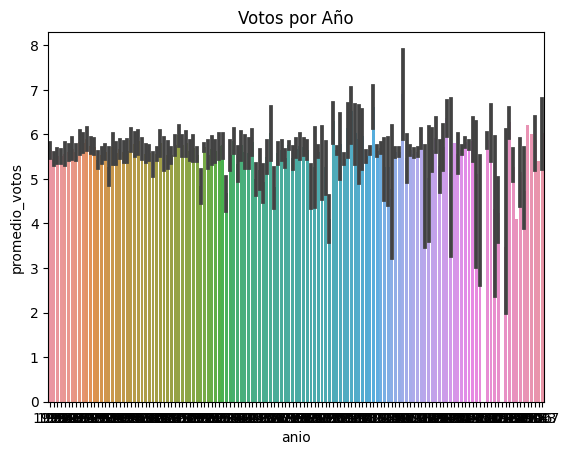

In [69]:
sns.barplot(x='anio', y='promedio_votos', data=df)
plt.title("Votos por Año")
plt.show()

In [ ]:
en qué año hubo el ingreso promedio más alto

In [70]:
df.columns

Index(['presupuesto', 'generos', 'id', 'idioma_original', 'sinopsis',
       'popularidad', 'companias_productoras', 'paises_productores',
       'fecha_estreno', 'ingresos', 'duracion', 'idioma_hablado', 'estado',
       'lema', 'titulo', 'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [71]:
df.groupby('anio')['ingresos'].mean().sort_values(ascending=False)

anio
2017    2.833815e+07
2016    1.901364e+07
2003    1.787656e+07
2004    1.780860e+07
1997    1.735976e+07
            ...     
1913    0.000000e+00
1914    0.000000e+00
1917    0.000000e+00
1919    0.000000e+00
2020    0.000000e+00
Name: ingresos, Length: 135, dtype: float64

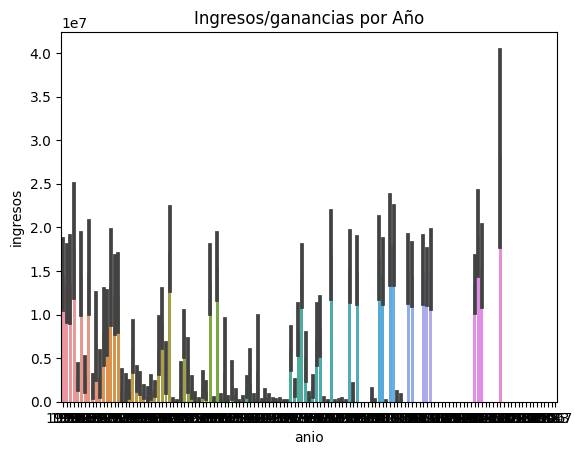

In [73]:
sns.barplot(x='anio', y='ingresos', data=df)
plt.title("Ingresos/ganancias por Año")
plt.show()

In [ ]:
encuentre la calificación promedio para cada director

In [74]:
df.columns

Index(['presupuesto', 'generos', 'id', 'idioma_original', 'sinopsis',
       'popularidad', 'companias_productoras', 'paises_productores',
       'fecha_estreno', 'ingresos', 'duracion', 'idioma_hablado', 'estado',
       'lema', 'titulo', 'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [76]:
df.groupby('companias_productoras')['promedio_votos'].mean()

KeyError: 'companias_productoras'

mostrar el título y el tiempo de ejecución de las 10 películas más largas

In [82]:
df.columns

Index(['colleccion', 'presupuesto', 'generos', 'id', 'idioma_original',
       'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia', 'duracion',
       'idioma_hablado', 'estado', 'lema', 'titulo', 'promedio_votos', 'anio',
       'mes', 'dia', 'retorno'],
      dtype='object')

In [84]:
df.nlargest(10,'duracion')

,colleccion,presupuesto,generos,id,idioma_original,sinopsis,popularidad,companias_productoras,paises_productores,fecha_estreno,...,duracion,idioma_hablado,estado,lema,titulo,promedio_votos,anio,mes,dia,retorno
24149,NaN,0,"['Drama', 'History']",67493,en,The economic and cultural growth of Colorado s...,0.664727,['Universal Television'],['United States of America'],1978-10-01,...,1256.0,NaN,Released,NaN,Centennial,7.9,1978,Octubre,Domingo,0.0
19947,NaN,0,['Documentary'],142051,en,A survey of the musical form's history and maj...,1.507756,NaN,NaN,2001-01-09,...,1140.0,NaN,Released,NaN,Jazz,5.7,2001,Enero,Martes,0.0
40873,NaN,0,['Documentary'],126820,en,"Chronicles the sport's signature people, place...",0.145073,NaN,NaN,1994-09-18,...,1140.0,['English'],Released,NaN,Baseball,8.5,1994,Septiembre,Domingo,0.0
13762,NaN,0,['Drama'],45560,de,"Berlin Alexanderplatz, originally broadcast in...",2.255785,"['Bavaria Film', 'Westdeutscher Rundfunk (WDR)...","['Germany', 'Italy']",1980-08-28,...,931.0,['Deutsch'],Released,NaN,Berlin Alexanderplatz,8.4,1980,Agosto,Jueves,0.0
13947,NaN,0,"['Drama', 'History']",67463,de,This epic tale of a family and their rural lif...,0.016204,NaN,['Germany'],1984-09-16,...,925.0,NaN,Released,NaN,Heimat: A Chronicle of Germany,9.0,1984,Septiembre,Domingo,0.0
27824,NaN,0,['Documentary'],125336,en,"The Story of Film: An Odyssey, written and dir...",1.502510,NaN,['United Kingdom'],2011-09-03,...,900.0,['English'],Released,NaN,The Story of Film: An Odyssey,8.8,2011,Septiembre,Sábado,0.0
26652,NaN,0,['Science Fiction'],150004,en,"Taken spans five decades and four generations,...",10.628230,['DreamWorks SKG'],['United States of America'],2002-12-02,...,877.0,['English'],Released,Some secrets we keep. Some are kept from us,Taken,7.4,2002,Diciembre,Lunes,0.0
19144,NaN,0,"['Documentary', 'History', 'War']",208988,en,The War is a seven episode documentary miniser...,0.487489,['PBS'],['United States of America'],2007-09-23,...,874.0,['English'],Released,NaN,The War,5.3,2007,Septiembre,Domingo,0.0
34622,NaN,0,"['History', 'Documentary']",293603,en,A documentary that weaves together the stories...,0.824032,['Florentine Films'],['United States of America'],2014-09-15,...,840.0,['English'],Released,NaN,The Roosevelts: An Intimate History,8.3,2014,Septiembre,Lunes,0.0
34687,NaN,0,"['Adventure', 'Drama', 'History', 'War']",38430,ru,The series is based on a true story of a Russi...,0.977018,NaN,['Russia'],1973-01-01,...,840.0,['Pусский'],Released,NaN,Seventeen Moments in Spring,7.4,1973,Enero,Lunes,0.0


In [89]:
top10_len = df.nlargest(10,'duracion')[['titulo','duracion']].set_index('titulo')
top10_len

,duracion
titulo,
Centennial,1256.0
Jazz,1140.0
Baseball,1140.0
Berlin Alexanderplatz,931.0
Heimat: A Chronicle of Germany,925.0
The Story of Film: An Odyssey,900.0
Taken,877.0
The War,874.0
The Roosevelts: An Intimate History,840.0


<AxesSubplot: xlabel='duracion', ylabel='titulo'>

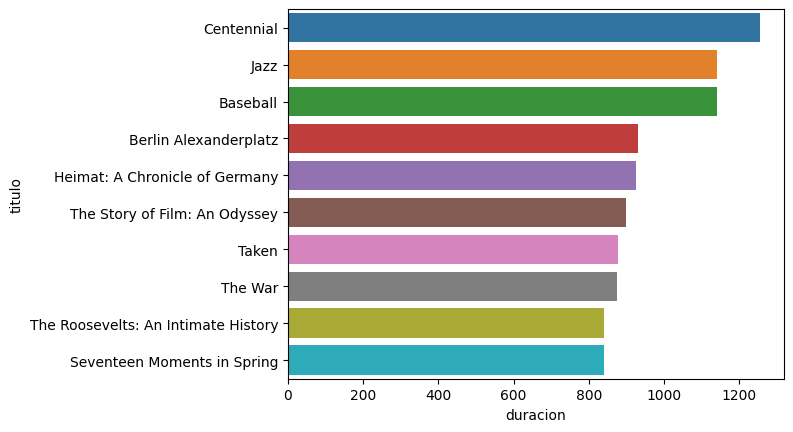

In [91]:
sns.barplot(x='duracion',y=top10_len.index,data=top10_len)

In [ ]:
mostrar el número de películas por año

In [92]:
df.columns

Index(['colleccion', 'presupuesto', 'generos', 'id', 'idioma_original',
       'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia', 'duracion',
       'idioma_hablado', 'estado', 'lema', 'titulo', 'promedio_votos', 'anio',
       'mes', 'dia', 'retorno'],
      dtype='object')

In [94]:
df['anio'].value_counts()

2014    1974
2015    1905
2013    1889
2012    1722
2011    1667
        ... 
2020       1
1887       1
1878       1
1874       1
1883       1
Name: anio, Length: 135, dtype: int64

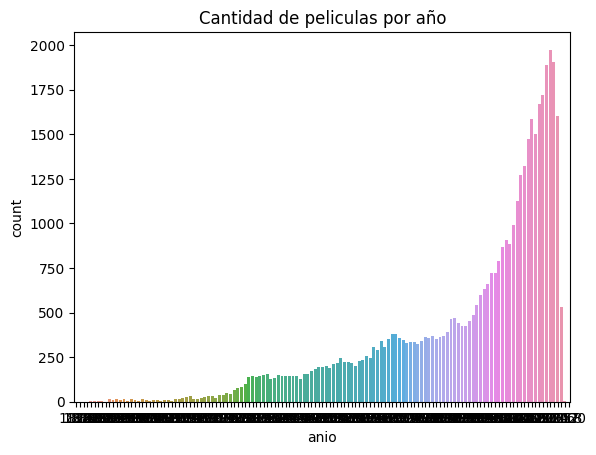

In [97]:
sns.countplot(x='anio',data=df)
plt.title("Cantidad de peliculas por año")
plt.show()

encontrar el título de la película más popular (con mayores ingresos/ganancias)

In [98]:
df.columns

Index(['colleccion', 'presupuesto', 'generos', 'id', 'idioma_original',
       'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia', 'duracion',
       'idioma_hablado', 'estado', 'lema', 'titulo', 'promedio_votos', 'anio',
       'mes', 'dia', 'retorno'],
      dtype='object')

In [100]:
df['ganancia'].max()

2787965087.0

In [101]:
df[df['ganancia'].max()==df['ganancia']]

,colleccion,presupuesto,generos,id,idioma_original,sinopsis,popularidad,companias_productoras,paises_productores,fecha_estreno,...,duracion,idioma_hablado,estado,lema,titulo,promedio_votos,anio,mes,dia,retorno
14545,Avatar Collection,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,en,"In the 22nd century, a paraplegic Marine is di...",185.070892,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,...,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,2009,Diciembre,Jueves,11.76


In [102]:
df[df['ganancia'].max()==df['ganancia']]['titulo']

14545    Avatar
Name: titulo, dtype: object

mostrar los 10 títulos de películas mejor calificados y sus directores

In [103]:
df.columns

Index(['colleccion', 'presupuesto', 'generos', 'id', 'idioma_original',
       'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia', 'duracion',
       'idioma_hablado', 'estado', 'lema', 'titulo', 'promedio_votos', 'anio',
       'mes', 'dia', 'retorno'],
      dtype='object')

In [104]:
top10_len= df.nlargest(10,'promedio_votos')[['titulo','promedio_votos','generos']].set_index('titulo')

In [105]:
top10_len

,promedio_votos,generos
titulo,,
Reckless,10.0,"['Fantasy', 'Comedy', 'Drama']"
Girl in the Cadillac,10.0,"['Romance', 'Adventure', 'Crime', 'Drama']"
"The Haunted World of Edward D. Wood, Jr.",10.0,['Documentary']
Carmen Miranda: Bananas Is My Business,10.0,['Documentary']
Other Voices Other Rooms,10.0,['Drama']
"Dancer, Texas Pop. 81",10.0,"['Comedy', 'Drama', 'Family']"
The Farmer's Wife,10.0,['Drama']
Stiff Upper Lips,10.0,['Comedy']
Ten Benny,10.0,"['Drama', 'Action']"


<AxesSubplot: xlabel='promedio_votos', ylabel='titulo'>

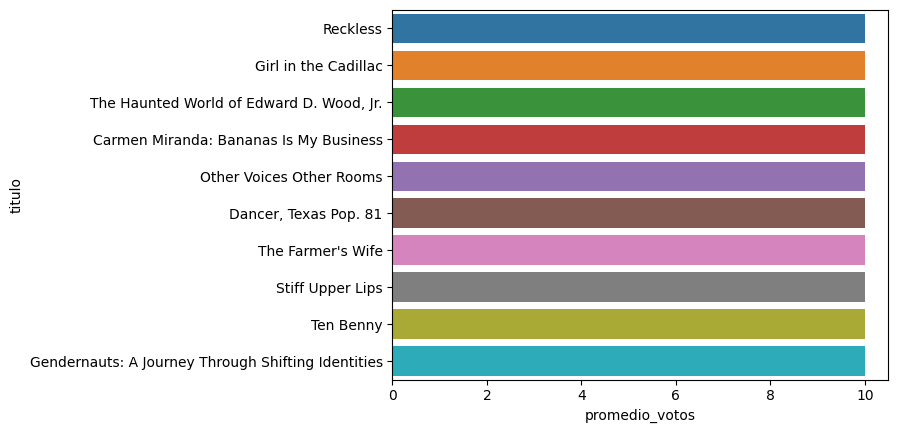

In [106]:
sns.barplot(x='promedio_votos', y=top10_len.index, data = top10_len)

<AxesSubplot: xlabel='promedio_votos', ylabel='titulo'>

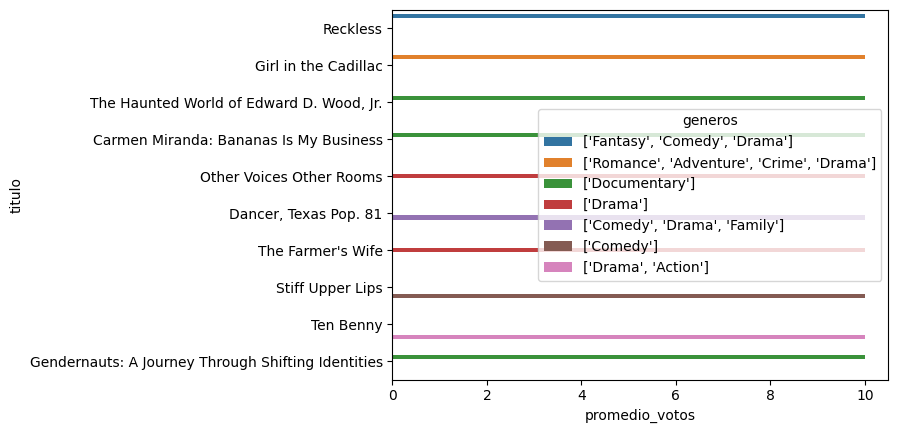

In [107]:
sns.barplot(x='promedio_votos', y=top10_len.index, data = top10_len, hue='generos')

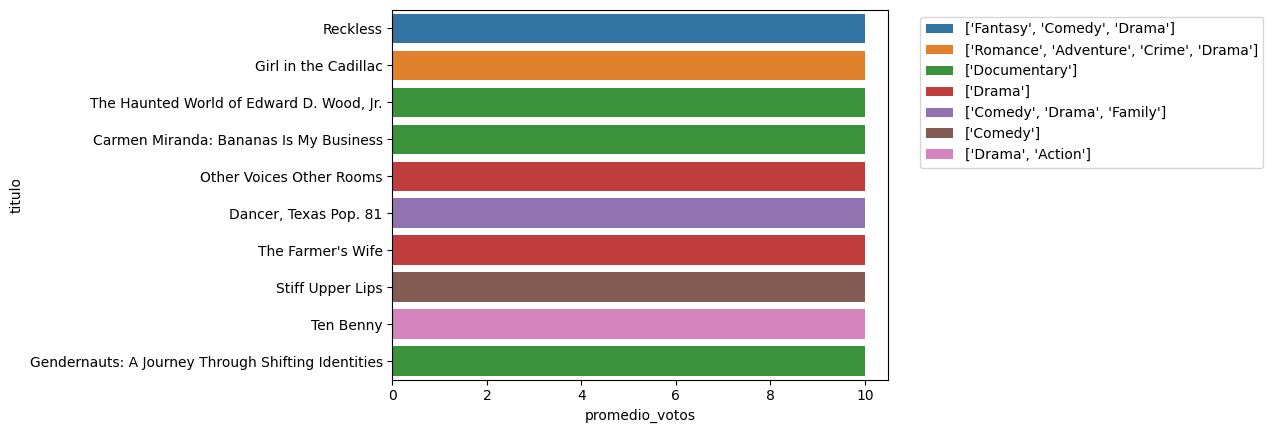

In [110]:
sns.barplot(x='promedio_votos', y=top10_len.index, data = top10_len, hue='generos', dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

mostrar los 10 títulos de películas con mayores ingresos

In [130]:
df.columns

Index(['colleccion', 'presupuesto (millones)', 'generos', 'id',
       'idioma_original', 'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia (millones)',
       'duracion', 'idioma_hablado', 'estado', 'lema', 'titulo',
       'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [131]:
df.nlargest(10,'ganancia (millones)')

,colleccion,presupuesto (millones),generos,id,idioma_original,sinopsis,popularidad,companias_productoras,paises_productores,fecha_estreno,...,duracion,idioma_hablado,estado,lema,titulo,promedio_votos,anio,mes,dia,retorno
14545,Avatar Collection,237.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,en,"In the 22nd century, a paraplegic Marine is di...",185.070892,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,...,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,2009,Diciembre,Jueves,11.76
26525,Star Wars Collection,245.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",140607,en,Thirty years after defeating the Galactic Empi...,31.626013,"['Lucasfilm', 'Truenorth Productions', 'Bad Ro...",['United States of America'],2015-12-15,...,136.0,['English'],Released,Every generation has a story.,Star Wars: The Force Awakens,7.5,2015,Diciembre,Martes,8.44
1637,NaN,200.0,"['Drama', 'Romance', 'Thriller']",597,en,"84 years later, a 101-year-old woman named Ros...",26.889070,"['Paramount Pictures', 'Twentieth Century Fox ...",['United States of America'],1997-11-18,...,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Released,Nothing on Earth could come between them.,Titanic,7.5,1997,Noviembre,Martes,9.23
17807,The Avengers Collection,220.0,"['Science Fiction', 'Action', 'Adventure']",24428,en,When an unexpected enemy emerges and threatens...,89.887648,"['Paramount Pictures', 'Marvel Studios']",['United States of America'],2012-04-25,...,143.0,['English'],Released,Some assembly required.,The Avengers,7.4,2012,Abril,Miércoles,6.91
25054,Jurassic Park Collection,150.0,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,en,Twenty-two years after the events of Jurassic ...,32.790475,"['Universal Studios', 'Amblin Entertainment', ...",['United States of America'],2015-06-09,...,124.0,['English'],Released,The park is open.,Jurassic World,6.5,2015,Junio,Martes,10.09
28799,The Fast and the Furious Collection,190.0,['Action'],168259,en,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,"['Universal Pictures', 'Original Film', 'Fuji ...","['Japan', 'United States of America']",2015-04-01,...,137.0,['English'],Released,Vengeance Hits Home,Furious 7,7.3,2015,Abril,Miércoles,7.93
26528,The Avengers Collection,280.0,"['Action', 'Adventure', 'Science Fiction']",99861,en,When Tony Stark tries to jumpstart a dormant p...,37.379420,"['Marvel Studios', 'Prime Focus', 'Revolution ...",['United States of America'],2015-04-22,...,141.0,['English'],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,2015,Abril,Miércoles,5.02
17426,Harry Potter Collection,125.0,"['Family', 'Fantasy', 'Adventure']",12445,en,"Harry, Ron and Hermione continue their quest t...",24.990737,"['Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",2011-07-07,...,130.0,['English'],Released,It all ends here.,Harry Potter and the Deathly Hallows: Part 2,7.9,2011,Julio,Jueves,10.74
22084,Frozen Collection,150.0,"['Animation', 'Adventure', 'Family']",109445,en,Young princess Anna of Arendelle dreams about ...,24.248243,"['Walt Disney Pictures', 'Walt Disney Animatio...",['United States of America'],2013-11-27,...,102.0,['English'],Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,2013,Noviembre,Miércoles,8.49
42151,NaN,160.0,"['Family', 'Fantasy', 'Romance']",321612,en,A live-action adaptation of Disney's version o...,287.253654,"['Walt Disney Pictures', 'Mandeville Films']","['United Kingdom', 'United States of America']",2017-03-16,...,129.0,['English'],Released,Be our guest.,Beauty and the Beast,6.8,2017,Marzo,Jueves,7.89


In [132]:
df.nlargest(10,'ganancia (millones)')['titulo']

14545                                          Avatar
26525                    Star Wars: The Force Awakens
1637                                          Titanic
17807                                    The Avengers
25054                                  Jurassic World
28799                                       Furious 7
26528                         Avengers: Age of Ultron
17426    Harry Potter and the Deathly Hallows: Part 2
22084                                          Frozen
42151                            Beauty and the Beast
Name: titulo, dtype: object

In [133]:
df.nlargest(10,'ganancia (millones)')[['titulo','ganancia (millones)']]

,titulo,ganancia (millones)
14545,Avatar,2787.965087
26525,Star Wars: The Force Awakens,2068.223624
1637,Titanic,1845.034188
17807,The Avengers,1519.557910
25054,Jurassic World,1513.528810
28799,Furious 7,1506.249360
26528,Avengers: Age of Ultron,1405.403694
17426,Harry Potter and the Deathly Hallows: Part 2,1342.000000
22084,Frozen,1274.219009
42151,Beauty and the Beast,1262.886337


In [141]:
top_10=df.nlargest(10,'ganancia (millones)')[['titulo','ganancia (millones)']].set_index('titulo')
top_10

,ganancia (millones)
titulo,
Avatar,2787.965087
Star Wars: The Force Awakens,2068.223624
Titanic,1845.034188
The Avengers,1519.557910
Jurassic World,1513.528810
Furious 7,1506.249360
Avengers: Age of Ultron,1405.403694
Harry Potter and the Deathly Hallows: Part 2,1342.000000
Frozen,1274.219009


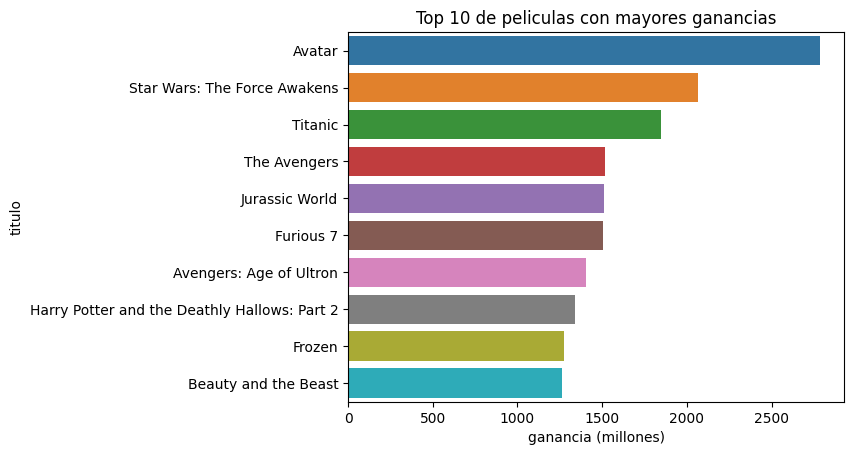

In [144]:
sns.barplot(x='ganancia (millones)', y = top_10.index,data=top_10)
plt.title("Top 10 de peliculas con mayores ganancias")
plt.show()

In [ ]:
encontrar la calificación promedio de las películas por año

In [145]:
df.columns

Index(['colleccion', 'presupuesto (millones)', 'generos', 'id',
       'idioma_original', 'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia (millones)',
       'duracion', 'idioma_hablado', 'estado', 'lema', 'titulo',
       'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [148]:
df.groupby('anio')['promedio_votos'].mean()

anio
1874    6.000000
1878    6.200000
1883    5.400000
1887    4.100000
1888    5.150000
          ...   
2015    5.764882
2016    5.823628
2017    5.864662
2018    0.000000
2020    0.000000
Name: promedio_votos, Length: 135, dtype: float64

In [149]:
df.groupby('anio')['promedio_votos'].mean().sort_values(ascending=False)

anio
1902    6.900000
1924    6.610256
1923    6.526087
1910    6.371429
1928    6.301515
          ...   
1930    4.103704
1887    4.100000
1892    3.466667
2018    0.000000
2020    0.000000
Name: promedio_votos, Length: 135, dtype: float64

¿La calificación afecta los ingresos?

In [151]:
df.columns

Index(['colleccion', 'presupuesto (millones)', 'generos', 'id',
       'idioma_original', 'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia (millones)',
       'duracion', 'idioma_hablado', 'estado', 'lema', 'titulo',
       'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

<AxesSubplot: xlabel='promedio_votos', ylabel='ganancia (millones)'>

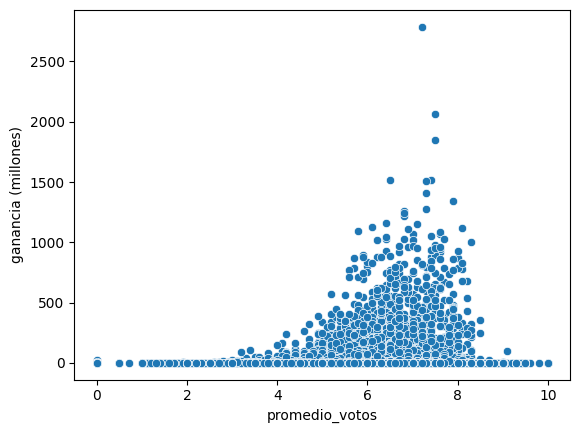

In [153]:
sns.scatterplot(x='promedio_votos', y ='ganancia (millones)', data=df)

clasificar las películas según las calificaciones (excelente, bueno y promedio)

In [154]:
df.columns

Index(['colleccion', 'presupuesto (millones)', 'generos', 'id',
       'idioma_original', 'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia (millones)',
       'duracion', 'idioma_hablado', 'estado', 'lema', 'titulo',
       'promedio_votos', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [156]:
def promedio_votos(promedio_votos):
    if promedio_votos >=7.0:
        return "Excelente"
    elif promedio_votos >= 6.0:
        return "Bueno"
    else:
        return "Promedio"

In [161]:
df['promedio_votos_cat'] = df['promedio_votos'].apply(promedio_votos)
df.head()

,colleccion,presupuesto (millones),generos,id,idioma_original,sinopsis,popularidad,companias_productoras,paises_productores,fecha_estreno,...,idioma_hablado,estado,lema,titulo,promedio_votos,anio,mes,dia,retorno,promedio_votos_cat
0,Toy Story Collection,30.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,['English'],Released,NaN,Toy Story,7.7,1995,Octubre,Lunes,12.45,Excelente
1,NaN,65.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,Diciembre,Viernes,4.04,Bueno
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,Diciembre,Viernes,0.00,Bueno
3,NaN,16.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,Diciembre,Viernes,5.09,Bueno
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995,Febrero,Viernes,0.00,Promedio


contar el número de películas de acción

In [162]:
df.columns

Index(['colleccion', 'presupuesto (millones)', 'generos', 'id',
       'idioma_original', 'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia (millones)',
       'duracion', 'idioma_hablado', 'estado', 'lema', 'titulo',
       'promedio_votos', 'anio', 'mes', 'dia', 'retorno',
       'promedio_votos_cat'],
      dtype='object')

In [163]:
df['generos'].dtype

dtype('O')

In [172]:
df['generos'] = df['generos'].fillna('')
df_action=df[df['generos'].str.contains('action', case=False)]
df_action

,colleccion,presupuesto (millones),generos,id,idioma_original,sinopsis,popularidad,companias_productoras,paises_productores,fecha_estreno,...,idioma_hablado,estado,lema,titulo,promedio_votos,anio,mes,dia,retorno,promedio_votos_cat
5,NaN,60.0,"['Action', 'Crime', 'Drama', 'Thriller']",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],1995-12-15,...,"['English', 'Español']",Released,A Los Angeles Crime Saga,Heat,7.7,1995,Diciembre,Viernes,3.12,Excelente
7,NaN,0.0,"['Action', 'Adventure', 'Drama', 'Family']",45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,['Walt Disney Pictures'],['United States of America'],1995-12-22,...,"['English', 'Deutsch']",Released,The Original Bad Boys.,Tom and Huck,5.4,1995,Diciembre,Viernes,0.00,Promedio
8,NaN,35.0,"['Action', 'Adventure', 'Thriller']",9091,en,International action superstar Jean Claude Van...,5.231580,"['Universal Pictures', 'Imperial Entertainment...",['United States of America'],1995-12-22,...,['English'],Released,Terror goes into overtime.,Sudden Death,5.5,1995,Diciembre,Viernes,1.84,Promedio
9,James Bond Collection,58.0,"['Adventure', 'Action', 'Thriller']",710,en,James Bond must unmask the mysterious head of ...,14.686036,"['United Artists', 'Eon Productions']","['United Kingdom', 'United States of America']",1995-11-16,...,"['English', 'Pусский', 'Español']",Released,No limits. No fears. No substitutes.,GoldenEye,6.6,1995,Noviembre,Jueves,6.07,Bueno
14,NaN,98.0,"['Action', 'Adventure']",1408,en,"Morgan Adams and her slave, William Shaw, are ...",7.284477,"['Le Studio Canal+', 'Laurence Mark Production...","['France', 'Germany', 'Italy', 'United States ...",1995-12-22,...,"['English', 'Latin']",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,5.7,1995,Diciembre,Viernes,0.10,Promedio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45339,NaN,0.0,"['Action', 'Romance', 'Thriller']",45029,en,Buxom do-gooders Donna and Nicole set out to r...,1.092445,['Malibu Bay Films'],['United States of America'],1993-10-27,...,['English'],Released,They're sexy. They're fearless. They're... Fit...,Fit to Kill,5.0,1993,Octubre,Miércoles,0.00,Promedio
45347,NaN,0.0,"['Action', 'Mystery', 'Thriller', 'Horror']",45527,en,A stranger named Silas flees from a devastatin...,1.270832,"['Boll Kino Beteiligungs GmbH & Co. KG', 'Brig...","['Canada', 'Germany']",2010-01-01,...,['English'],Released,"Action, Horror",The Final Storm,3.7,2010,Enero,Viernes,0.00,Promedio
45361,NaN,0.0,"['Fantasy', 'Action', 'Thriller']",49280,fr,A band-leader has arranged seven chairs for th...,1.109068,['Star Film Company'],['France'],1900-01-01,...,['No Language'],Released,NaN,The One-Man Band,6.5,1900,Enero,Lunes,0.00,Bueno
45371,NaN,0.0,"['Drama', 'Action', 'Romance']",30840,en,"Yet another version of the classic epic, with ...",5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",1991-05-13,...,['English'],Released,NaN,Robin Hood,5.7,1991,Mayo,Lunes,0.00,Promedio


In [173]:
len(df[df['generos'].str.contains('action', case=False)])

6592

encontrar valores únicos de género

In [174]:
df.columns

Index(['colleccion', 'presupuesto (millones)', 'generos', 'id',
       'idioma_original', 'sinopsis', 'popularidad', 'companias_productoras',
       'paises_productores', 'fecha_estreno', 'ganancia (millones)',
       'duracion', 'idioma_hablado', 'estado', 'lema', 'titulo',
       'promedio_votos', 'anio', 'mes', 'dia', 'retorno',
       'promedio_votos_cat'],
      dtype='object')

In [175]:
df['generos']

0         ['Animation', 'Comedy', 'Family']
1        ['Adventure', 'Fantasy', 'Family']
2                     ['Romance', 'Comedy']
3            ['Comedy', 'Drama', 'Romance']
4                                ['Comedy']
                        ...                
45371        ['Drama', 'Action', 'Romance']
45372                             ['Drama']
45373       ['Action', 'Drama', 'Thriller']
45374                                      
45375                                      
Name: generos, Length: 45376, dtype: object

In [11]:
list1=[]
for value in df['genero']:
    list1.append(value.split(','))
    

AttributeError: 'float' object has no attribute 'split'

In [179]:
list1

[["['Animation', 'Comedy', 'Family']"],
 ["['Adventure', 'Fantasy', 'Family']"],
 ["['Romance', 'Comedy']"],
 ["['Comedy', 'Drama', 'Romance']"],
 ["['Comedy']"],
 ["['Action', 'Crime', 'Drama', 'Thriller']"],
 ["['Comedy', 'Romance']"],
 ["['Action', 'Adventure', 'Drama', 'Family']"],
 ["['Action', 'Adventure', 'Thriller']"],
 ["['Adventure', 'Action', 'Thriller']"],
 ["['Comedy', 'Drama', 'Romance']"],
 ["['Comedy', 'Horror']"],
 ["['Family', 'Animation', 'Adventure']"],
 ["['History', 'Drama']"],
 ["['Action', 'Adventure']"],
 ["['Drama', 'Crime']"],
 ["['Drama', 'Romance']"],
 ["['Crime', 'Comedy']"],
 ["['Crime', 'Comedy', 'Adventure']"],
 ["['Action', 'Comedy', 'Crime']"],
 ["['Comedy', 'Thriller', 'Crime']"],
 ["['Drama', 'Thriller']"],
 ["['Action', 'Adventure', 'Crime', 'Thriller']"],
 ["['Drama', 'Fantasy', 'Science Fiction', 'Thriller']"],
 ["['Drama', 'Romance']"],
 ["['Drama']"],
 ["['Comedy', 'Drama', 'Family']"],
 ["['Drama', 'Romance']"],
 ["['Fantasy', 'Science Fiction

In [182]:
def parse_generos(string):
    try:
        generos = ast.literal_eval(string)
        if isinstance(generos, list):
            return generos
    except (SyntaxError, ValueError):
        pass
    return []

df['generos'] = df['generos'].apply(parse_generos)

generos_unicos = df['generos'].explode().unique()
print(generos_unicos)

['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'History' 'Science Fiction'
 'Mystery' 'War' 'Foreign' nan 'Music' 'Documentary' 'Western' 'TV Movie']


In [183]:
generos_unicos

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', nan, 'Music',
       'Documentary', 'Western', 'TV Movie'], dtype=object)

In [184]:
len(generos_unicos)

21

cuantas peliculas de cada genero se hicieron

In [9]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)

NameError: name 'list1' is not defined

In [8]:
# Cuenta las películas de cada género
genero_counts = df['genero'].explode().value_counts()

# Imprime los resultados
print(genero_counts)

['Drama']                                                                      4998
['Comedy']                                                                     3621
['Documentary']                                                                2713
['Drama', 'Romance']                                                           1301
['Comedy', 'Drama']                                                            1135
                                                                               ... 
['Adventure', 'Action', 'Drama', 'Science Fiction', 'Thriller']                   1
['Family', 'Drama', 'Fantasy']                                                    1
['Action', 'Adventure', 'Romance', 'Thriller']                                    1
['Science Fiction', 'Adventure', 'Animation', 'Action', 'Family', 'Comedy']       1
['Family', 'Animation', 'Romance', 'Comedy']                                      1
Name: genero, Length: 4064, dtype: int64


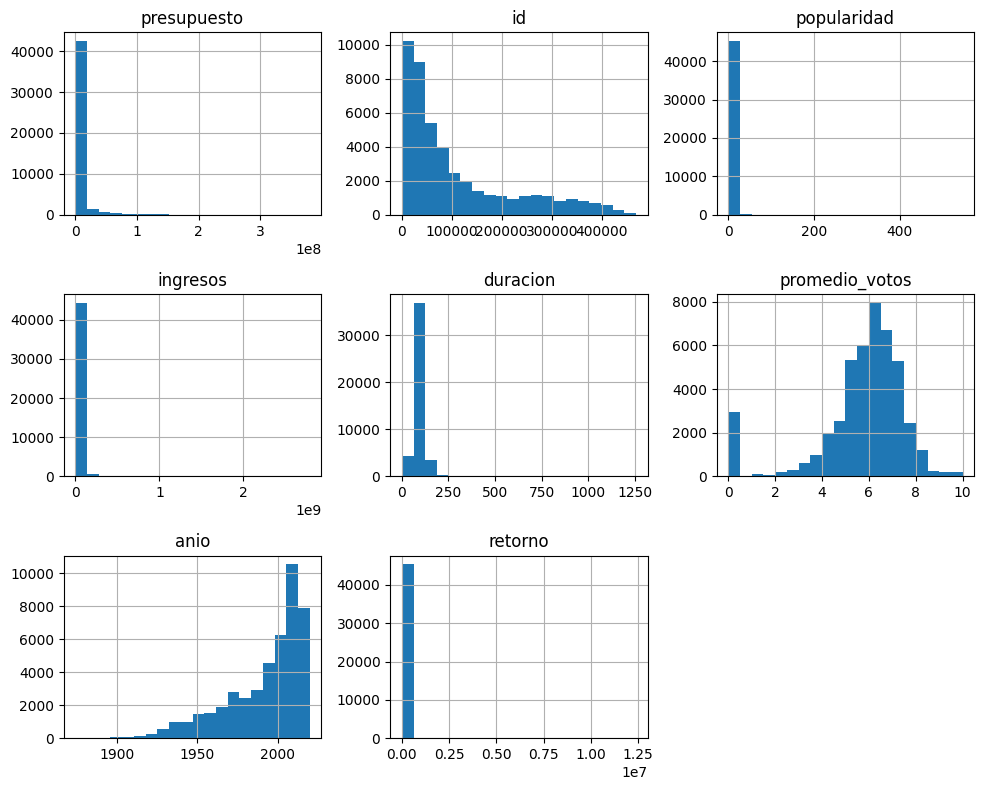

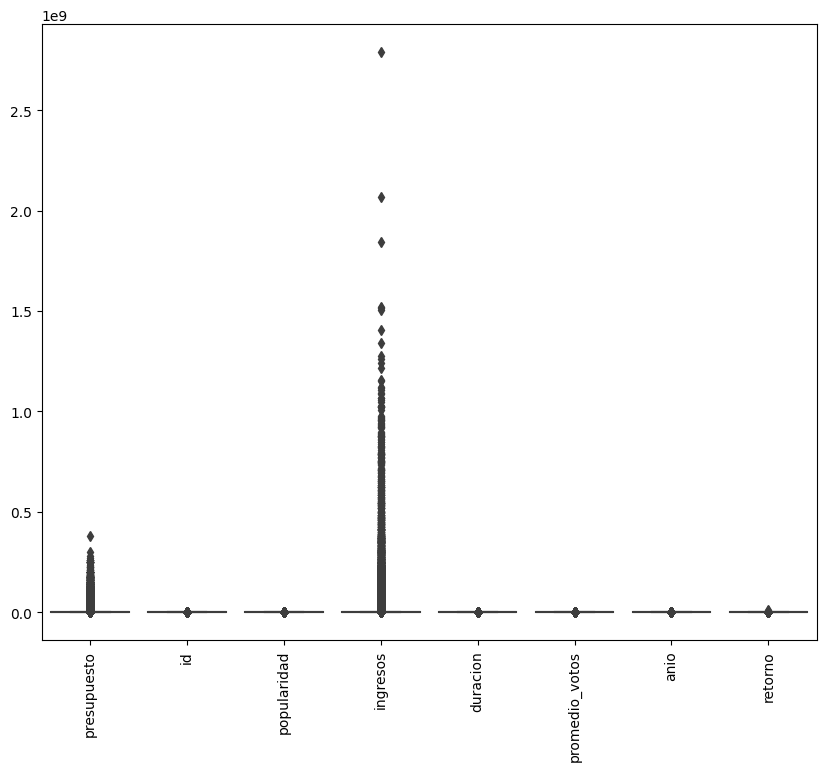

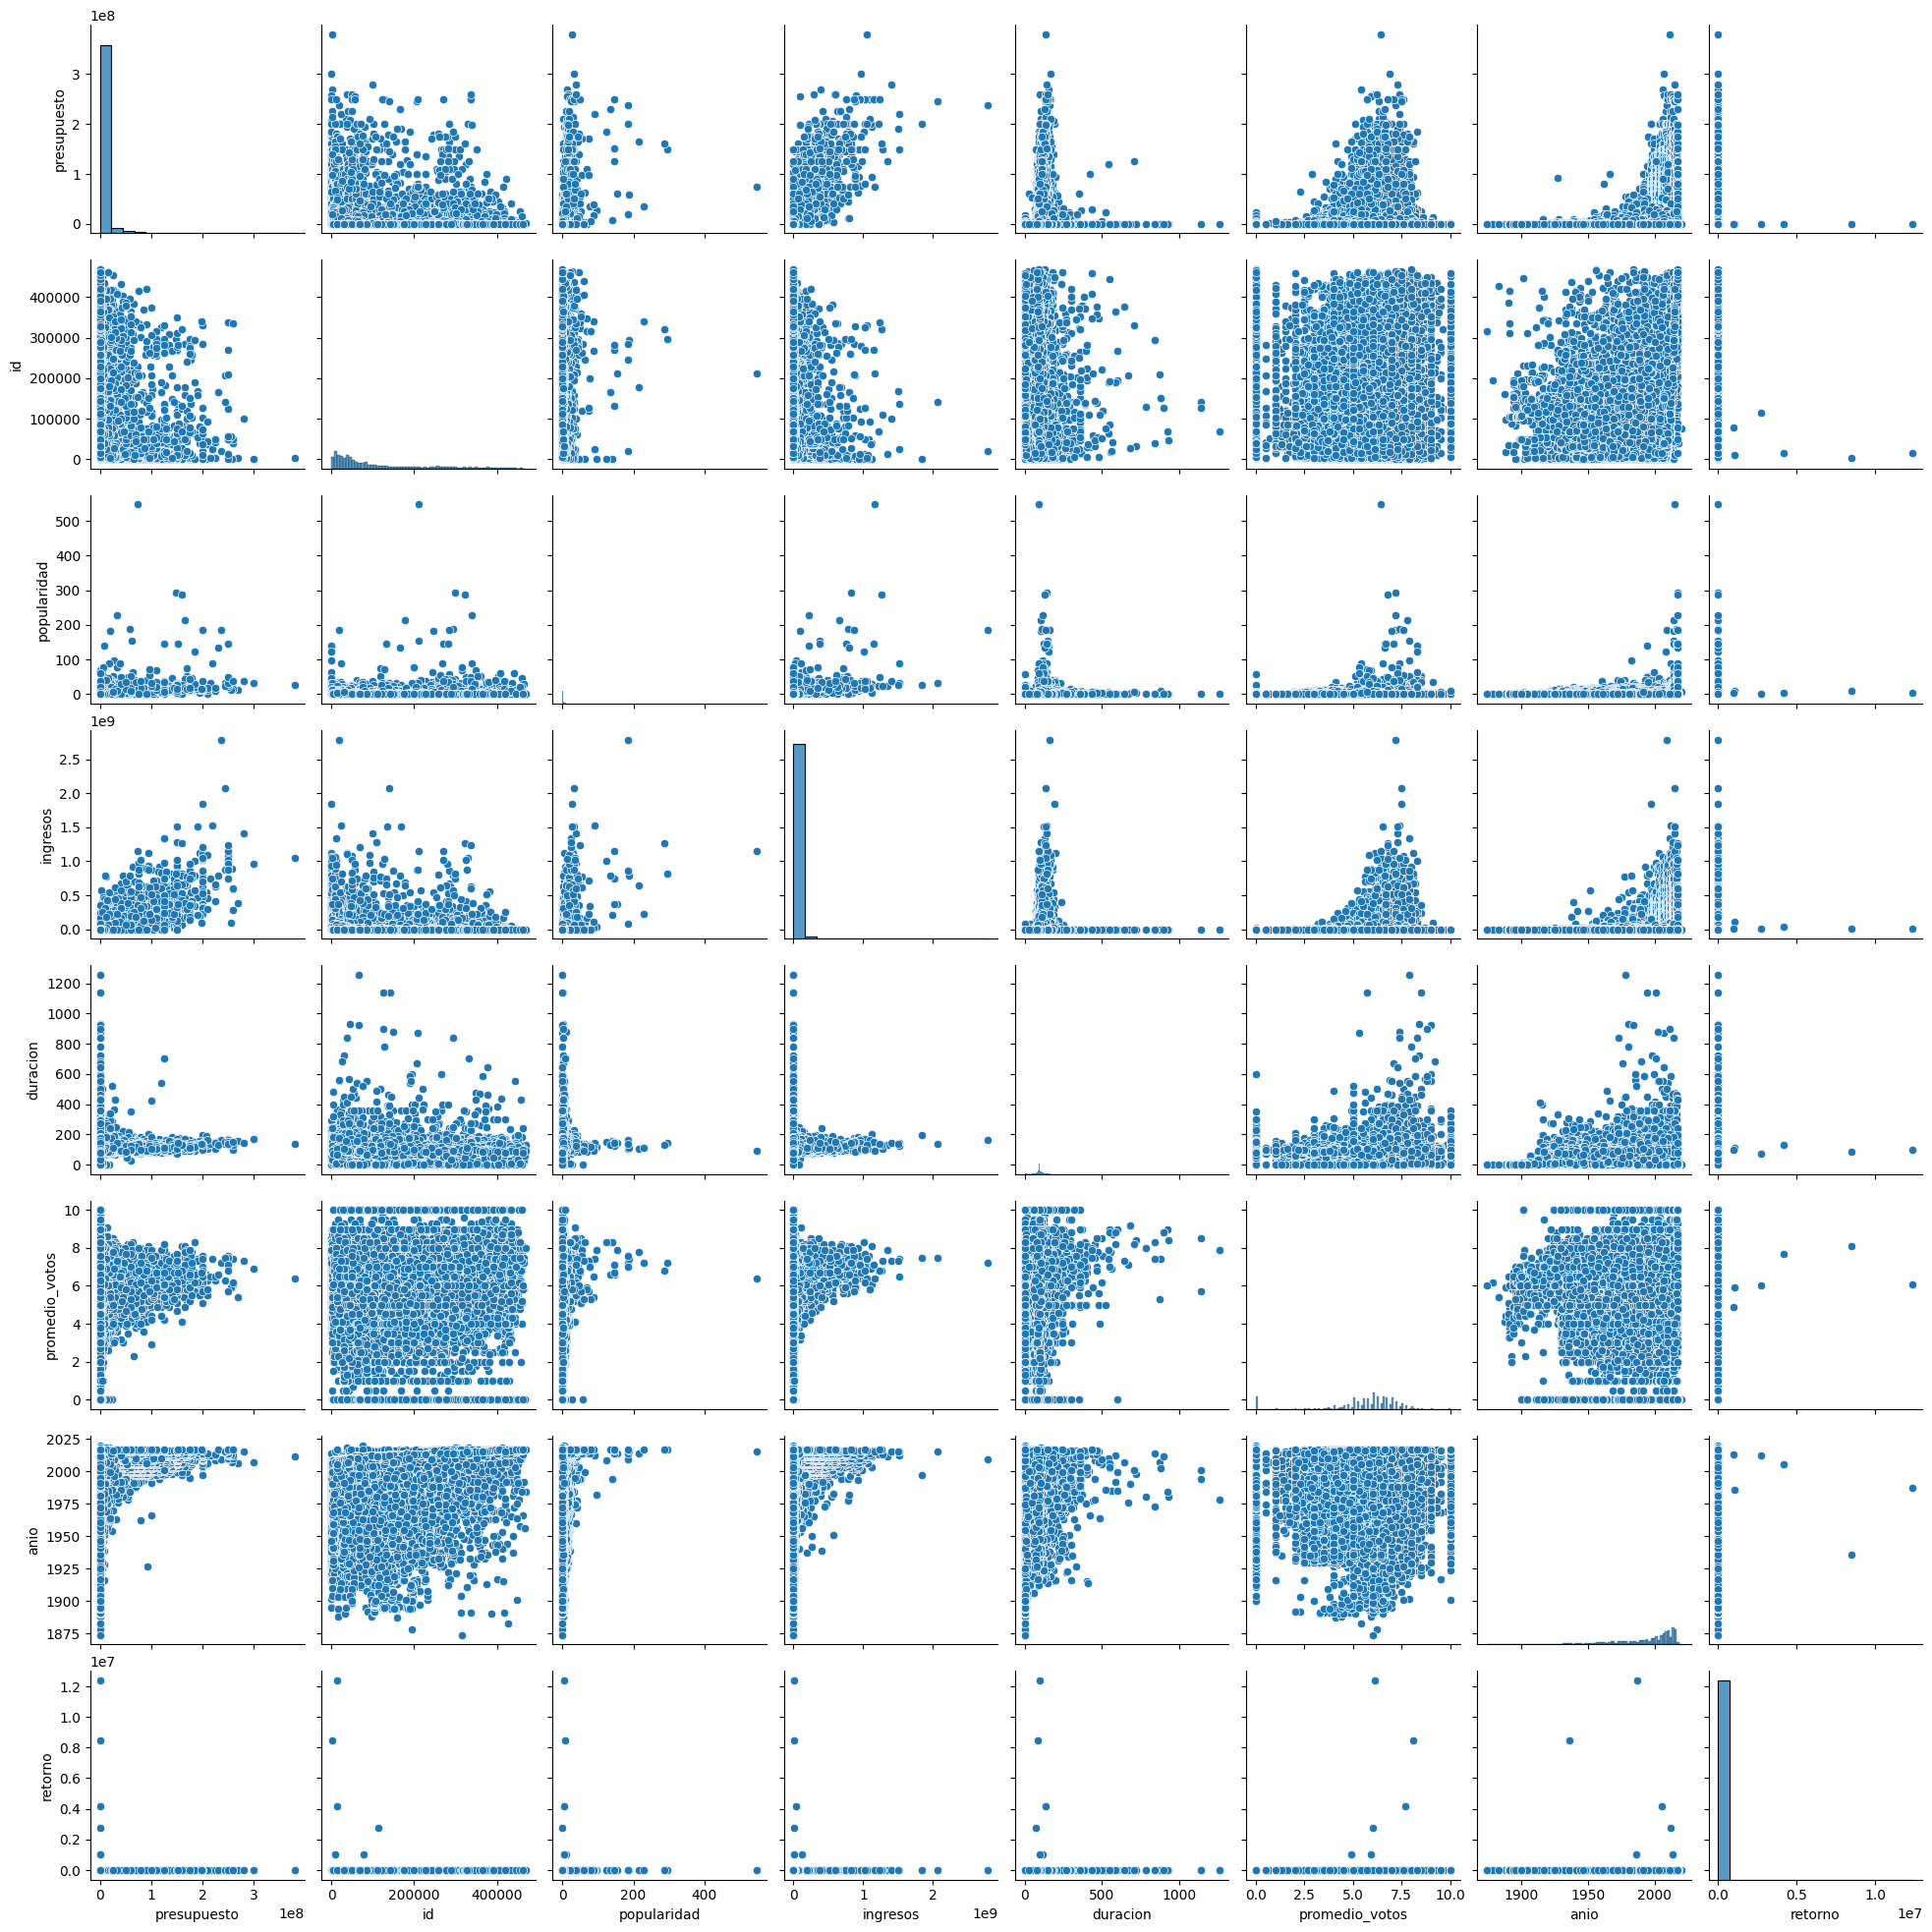

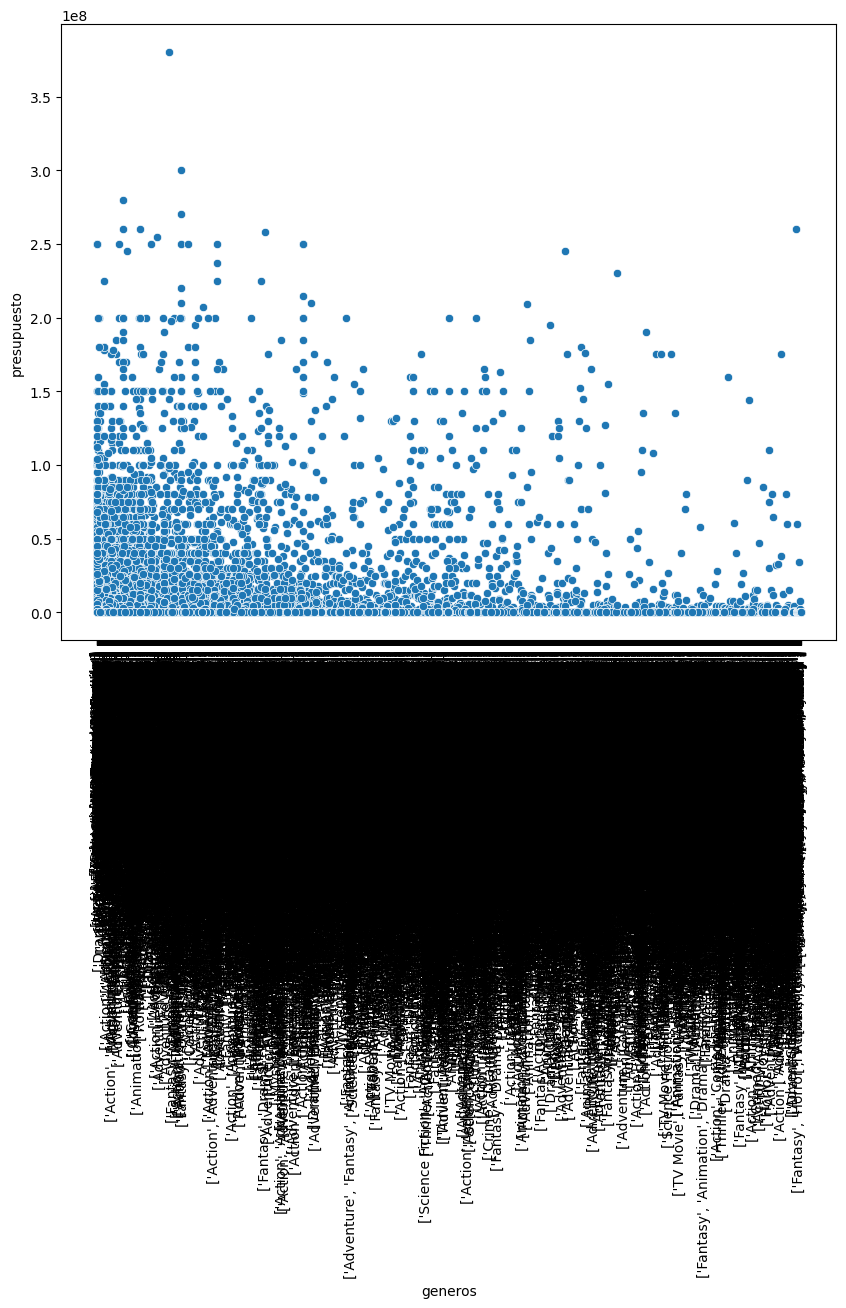

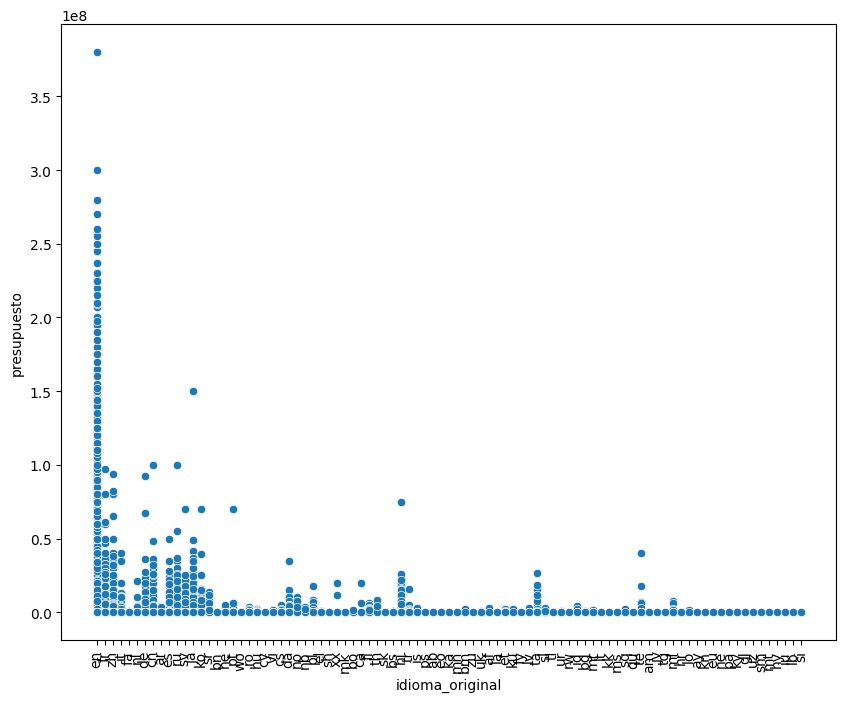

/home/jjcuri/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.

/home/jjcuri/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 12369 (\N{HIRAGANA LETTER KE}) missing from current font.

/home/jjcuri/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.

/home/jjcuri/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.

/home/jjcuri/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 12378 (\N{HIRAGANA LETTER ZU}) missing from current font.

/home/jjcuri/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 12385 (\N{HIRAGANA LETTER TI}) missing from current font.

/home/jjcuri/.local/lib/python3.10/site-

KeyboardInterrupt: 

In [25]:
# Identificar variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns
variables_categoricas = df.select_dtypes(include=['object']).columns

# Histogramas de variables numéricas
df[variables_numericas].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Gráficos de caja de variables numéricas
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[variables_numericas])
plt.xticks(rotation=90)
plt.show()

# Diagramas de dispersión de pares de variables numéricas
sns.pairplot(df[variables_numericas])
plt.show()

# Diagramas de dispersión de variables numéricas y categóricas
for variable_cat in variables_categoricas:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=variable_cat, y=variables_numericas[0], data=df)
    plt.xticks(rotation=90)
    plt.show()

 Investigar las relaciones entre las variables utilizando gráficos de correlación, diagramas de dispersión o mapas de calor de correlación. Esto puede ayudarte a identificar posibles correlaciones o patrones interesantes entre las variables.

In [27]:

# Calcular la matriz de correlación
correlation_matrix = df.corr()

/tmp/ipykernel_209127/1378939168.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



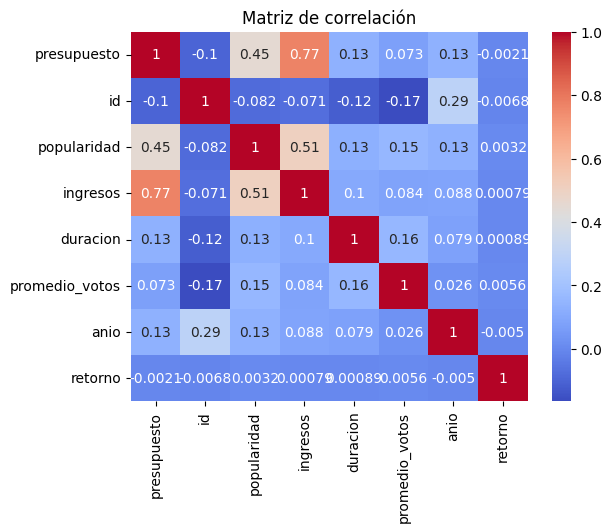

In [28]:


# Visualizar la matriz de correlación como un gráfico de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

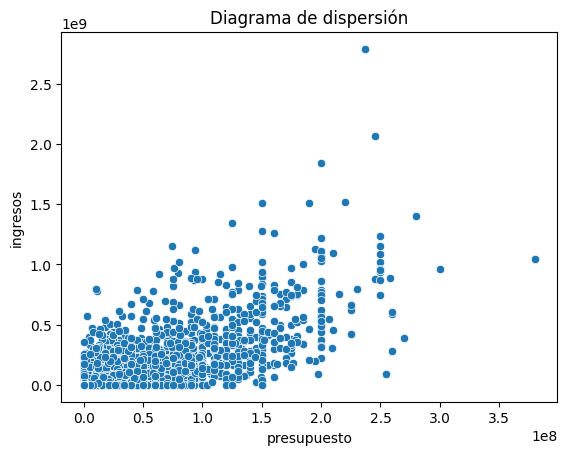

In [30]:

# Crear un diagrama de dispersión entre dos variables
sns.scatterplot(x='presupuesto', y='ingresos', data=df)
plt.title('Diagrama de dispersión')
plt.show()

In [54]:
def recomendacion(titulo):
    pelicula_seleccionada = df[df['title'] == titulo]
    if pelicula_seleccionada.empty:
        return {'lista recomendada': 'No se encontró la película'}
    
    # Calcular la correlación de puntuaciones con otras películas
    correlaciones = df.corrwith(pelicula_seleccionada['puntuacion'])
    
    # Filtrar películas con una correlación alta (más similares)
    peliculas_similares = correlaciones.sort_values(ascending=False).head(6)[1:]
    
    # Obtener los nombres de las películas similares
    nombres_similares = df.loc[peliculas_similares.index, 'title'].tolist()
    
    return {'lista recomendada': nombres_similares}

In [55]:
recomendacion('Jumanjy')

{'lista recomendada': 'No se encontró la película'}

# SCKETCH

In [ ]:
df.sketch.ask('podemos hablar en español?')

/tmp/ipykernel_185582/2507643704.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



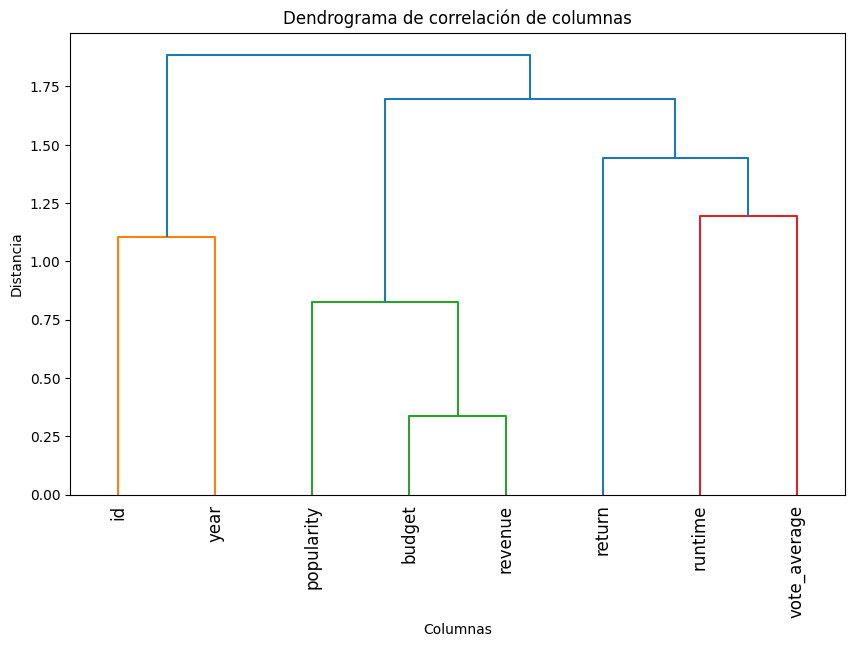

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# Calcula la matriz de correlación
corr_matrix = df.corr()

# Calcula las distancias entre las columnas
distances = hierarchy.distance.pdist(corr_matrix)

# Calcula el enlace jerárquico
linkage = hierarchy.linkage(distances, method='complete')

# Dibuja el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage, labels=corr_matrix.columns, leaf_rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Distancia')
plt.title('Dendrograma de correlación de columnas')
plt.show()
